# VISUALIZACION

In [1]:
pip install --upgrade pandas-datareader

Requirement already up-to-date: pandas-datareader in c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages (0.10.0)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
#importamos lo datos
from pandas_datareader import data as  pdr
from datetime import datetime

start = datetime(2021, 1, 1)
end = datetime(2022, 10, 31)

index = 'FDX'
df = pdr.get_data_yahoo(index, start = start, end = end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,260.500000,250.899994,260.399994,253.190002,3797100.0,246.968735
2021-01-05,254.770004,250.050003,251.500000,253.179993,3271100.0,246.958969
2021-01-06,258.980011,250.380005,250.460007,253.559998,3605300.0,247.329666
2021-01-07,256.209991,245.449997,254.089996,246.029999,5657300.0,239.984680
2021-01-08,247.360001,242.419998,246.520004,244.960007,4583900.0,238.940979
...,...,...,...,...,...,...
2022-10-25,157.330002,154.850006,155.889999,155.800003,3077700.0,155.800003
2022-10-26,159.169998,155.580002,156.380005,157.960007,3733800.0,157.960007
2022-10-27,160.300003,156.630005,158.940002,156.910004,1646700.0,156.910004


### Grafico de Lineas

<AxesSubplot: xlabel='Date'>

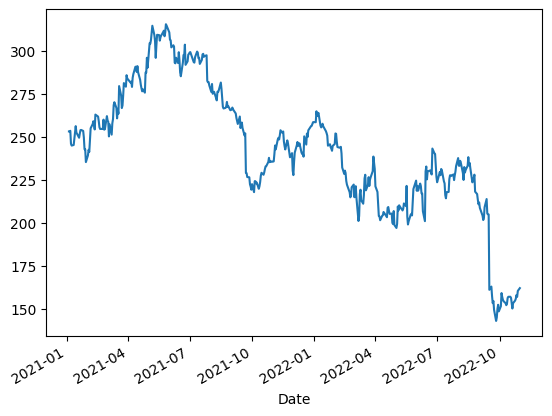

In [4]:
import matplotlib.pyplot as plt
df['Close'].plot(kind='line')

### Grafico de Velas

In [5]:
!pip install nbformat 

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import plotly.graph_objects as go

graph = {
    'x': df.index,
    'open': df.Open,
    'close': df.Close,
    'high': df.High,
    'low': df.Low,
    'type': 'candlestick',
    'name': 'FDX',
    'showlegend': True
}

layout = go.Figure(
    data = [graph],
    layout_title= "FedEx Stock"
)

layout

### Graficar 2 o mas acciones en un mismo grafico

In [22]:
#importamos una segunda accion en el mimo lapso de tiempo que la primera
start = datetime(2021, 1, 1)
end = datetime(2022, 10, 31)

index = 'MSFT'
df2 = pdr.get_data_yahoo(index, start = start, end = end)
df2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,223.000000,214.809998,222.529999,217.690002,37130100.0,214.479111
2021-01-05,218.520004,215.699997,217.259995,217.899994,23823000.0,214.686005
2021-01-06,216.490005,211.940002,212.169998,212.250000,35930700.0,209.119339
2021-01-07,219.339996,213.710007,214.039993,218.289993,27694500.0,215.070251
2021-01-08,220.580002,217.029999,218.679993,219.619995,22956200.0,216.380646
...,...,...,...,...,...,...
2022-10-25,251.039993,245.830002,247.259995,250.660004,34775500.0,250.660004
2022-10-26,238.300003,230.059998,231.169998,231.320007,82543200.0,231.320007
2022-10-27,233.690002,225.779999,231.039993,226.750000,40424600.0,226.750000


In [27]:
#agregamos las columnas necesarias para que solo nos queden los valores de clausura de cada accion
df['FDX'] = df['Close']
df['MSFT'] = df2['Close']
df = df.drop(columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis = 1)
df

,FDX,MSFT
Date,,
2021-01-04,253.190002,217.690002
2021-01-05,253.179993,217.899994
2021-01-06,253.559998,212.250000
2021-01-07,246.029999,218.289993
2021-01-08,244.960007,219.619995
...,...,...
2022-10-25,155.800003,250.660004
2022-10-26,157.960007,231.320007
2022-10-27,156.910004,226.750000


<AxesSubplot: xlabel='Date'>

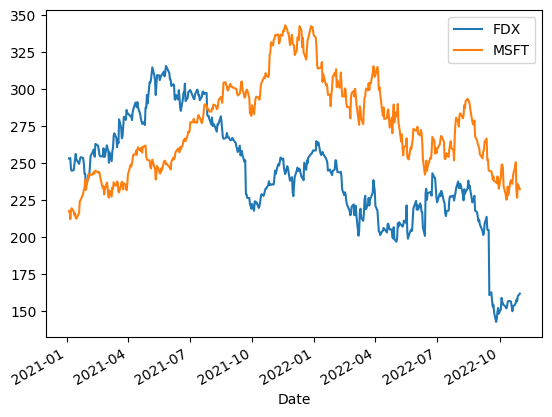

In [28]:
df.plot(kind='line')

Otras opciones para poder visualizar la información en python. Dependiendo del tipo de datos que se tengan, hay mejores opciones para visualizarlos:

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot
* ‘scatter’ : scatter plot
* ‘hexbin’ : hexbin plot